In [1]:
import numpy as np
import os
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Dropout,BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
from time import time

from tensorflow.keras.datasets import cifar10

Using TensorFlow backend.


Loading the dataset

In [2]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(train_x,train_y),(test_x,test_y)=cifar10.load_data()

Normalizing the Images

In [3]:
train_x=train_x/255.0
train_x.shape

(50000, 32, 32, 3)

In [4]:
test_x=test_x/255.0
test_x.shape

(10000, 32, 32, 3)

Randomly Checking a image

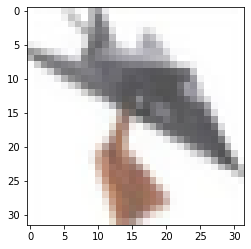

In [5]:
plt.imshow(test_x[215])

In [6]:
val_x = train_x[:5000] 
val_y = train_y[:5000]

In [7]:
# Building a Convolutional Neural Network
def getmodel(input_shape):
    # Input 
    X_input = Input(input_shape)
    X = Conv2D(filters=32,kernel_size=3,padding="same", activation="relu")(X_input)
    X = MaxPool2D(pool_size=2,strides=2,padding='valid')(X)
    X = Conv2D(filters=64,kernel_size=3,padding="same", activation="relu")(X)
    X = MaxPool2D(pool_size=2,strides=2,padding='valid')(X)
    X = Flatten()(X)
    X = Dense(units=128,activation='relu')(X)
    X = Dense(units=84,activation='relu')(X)
    X = Dense(units=10,activation='softmax')(X)
    
    model = Model(inputs=X_input, outputs=X, name='CNN')
    
    model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    print(model.summary())
    return model

In [8]:
CNN_model = getmodel(train_x[0].shape)

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0       

In [9]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, restore_best_weights=True, patience=1)
list_cb = [es]

In [10]:
start = time()
CNN_model.fit( train_x , train_y , epochs=50, batch_size=1024, validation_split=0.3, callbacks=list_cb)
training_time = time()-start

Epoch 1/50
35/35 [==============================] - 33s 874ms/step - loss: 2.1149 - accuracy: 0.2147 - val_loss: 1.6472 - val_accuracy: 0.4185
Epoch 2/50
35/35 [==============================] - 22s 620ms/step - loss: 1.5918 - accuracy: 0.4295 - val_loss: 1.4562 - val_accuracy: 0.4741
Epoch 3/50
35/35 [==============================] - 22s 644ms/step - loss: 1.4075 - accuracy: 0.4963 - val_loss: 1.3328 - val_accuracy: 0.5232
Epoch 4/50
35/35 [==============================] - 26s 731ms/step - loss: 1.3054 - accuracy: 0.5310 - val_loss: 1.2758 - val_accuracy: 0.5505
Epoch 5/50
35/35 [==============================] - 21s 600ms/step - loss: 1.2381 - accuracy: 0.5613 - val_loss: 1.1616 - val_accuracy: 0.5899
Epoch 6/50
35/35 [==============================] - 20s 588ms/step - loss: 1.1540 - accuracy: 0.5909 - val_loss: 1.1184 - val_accuracy: 0.6074
Epoch 7/50
35/35 [==============================] - 24s 683ms/step - loss: 1.0879 - accuracy: 0.6194 - val_loss: 1.0895 - val_accuracy: 0.6199

In [11]:
print(CNN_model.evaluate(test_x, test_y))

313/313 [==============================] - 47s 150ms/step - loss: 0.7470 - accuracy: 0.7529


[0.7470262050628662, 0.7529000043869019]

In [12]:
print(CNN_model.evaluate(train_x, train_y))

1563/1563 [==============================] - 240s 154ms/step - loss: 0.4111 - accuracy: 0.8712


[0.4110606610774994, 0.8712000250816345]

In [13]:
print(training_time)

860.6612575054169